# Wczytujemy dane z pliku

Zbiór to prawdziwe ceny mieszkań w Poznaniu zescrappowane z portalu gratka 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline  

In [3]:
r = pd.read_csv('ceny_mieszkan_w_poznaniu.tsv', sep = '\t')

# Oglądamy wstępnie dane

In [4]:
r.columns

Index(['price', 'isNew', 'rooms', 'floor', 'location', 'sqrMeters'], dtype='object')

In [5]:
r.shape

(1674, 6)

In [6]:
r.location.value_counts()

Grunwald        303
Winogrady       217
Rataje          164
Jeżyce          138
Stare           128
Centrum         116
Nowe             92
Piątkowo         76
Wilda            75
Naramowice       69
Starołęka        45
Podolany         41
Łazarz           34
Dębiec           32
Górczyn          31
Sołacz           21
Głuszyna         13
Szczepankowo     12
Ogrody            8
Malta             7
Winiary           5
Śródka            5
Zawady            5
Chwaliszewo       4
Bonin             3
Antoninek         3
Plewiska          3
Świerczewo        3
Garbary           3
Strzeszyn         2
Żegrze            2
Dolna             2
Ławica            1
Komandoria        1
Wilczak           1
Suchy             1
Kobylepole        1
Nadolnik          1
Komorniki         1
Kopernika         1
Dąbrowskiego      1
Morasko           1
Smochowice        1
Piatkowo          1
Name: location, dtype: int64

In [7]:
r.dtypes

price        float64
isNew           bool
rooms          int64
floor          int64
location      object
sqrMeters      int64
dtype: object

## Dane (typy danych/zmienne w statystyce) na przykładach
### Cena, ilośc m. kw. = zmienna ilościowa ciągła 

Przestrzeń liczb rzeczywistych (albo podzbiór ciągły)

tak samo np. zarobki, długośc w metrach, waga


### Ilość pokoi, piętro = zmienna ilościowa dyskretna

możemy uporządkować, skończona ilość, 

można powiedzieć że 4 pokoje to dwa razy więcej niż 2 pokoje

np. ocena w skali 1-10 (co 1), ilość dzieci


### zmienna ilościowa porządkowa ( w tym zbiorze nie ma)

można uporządkować (np wykształcenie), ale nie możemy powiedzieć że coś jest ileś razy większe

np. wykształcenie wyższe nie jest 2 razy bardziej od wykształcenia średniego

### lokacja = zmienna jakościowa (kategoryczna)

nie możemy uporządkować (bo nie można powiedzieć że Stare Miasto jest przed Sołaczem)

tak samo płeć albo wyznawana religia

In [8]:
r.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1674.0,367281.254283,163980.312648,100000.0,280062.5,330127.5,399000.0,2700000.0
rooms,1674.0,2.684588,0.775238,2.0,2.0,3.0,3.0,7.0
floor,1674.0,2.989247,2.950053,0.0,1.0,2.0,4.0,16.0
sqrMeters,1674.0,57.877539,23.091438,12.0,44.0,54.0,71.0,196.0


In [9]:
r.head()

,price,isNew,rooms,floor,location,sqrMeters
0,476118.0,False,3,1,Centrum,78
1,459531.0,False,3,2,Sołacz,62
2,411557.0,False,3,0,Sołacz,15
3,496416.0,False,4,0,Sołacz,14
4,406032.0,False,3,0,Sołacz,15


In [10]:
r['price'].head()

0    476118.0
1    459531.0
2    411557.0
3    496416.0
4    406032.0
Name: price, dtype: float64

# To teraz spróbujmy je narysować

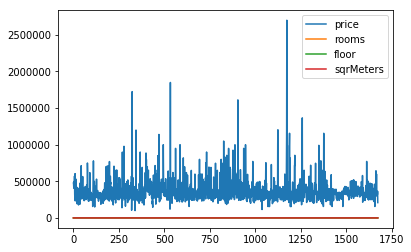

In [11]:
r.plot()

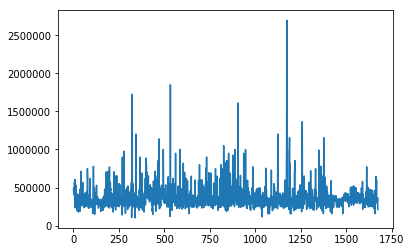

In [12]:
r['price'].plot()

## Te dane są w porządku losowym (więc powyższe wykresy są nieczytelne). Posortujmy je

In [13]:
r_sorted_by_price = r.sort_values(by=['price'])

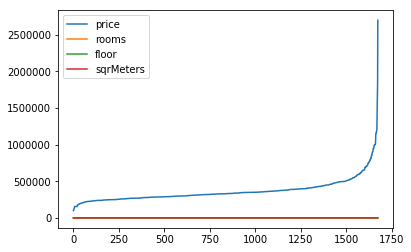

In [14]:
r_sorted_by_price.plot(use_index=False)

## Cena jest wysoka, możemy wziąć cenę w dziesiątkach tysięcy dla czytelności

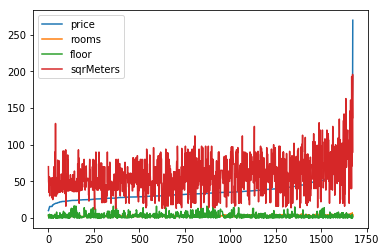

In [15]:
r_price_normalized = r_sorted_by_price.copy() # kopia przez wartość, a nie index
r_price_normalized['price'] = r_price_normalized['price'] / 10000 # dzielenie każdego wiersza przez 10000
r_price_normalized.plot(use_index=False)

## Nadal średnio to wygląda, bo danych jest zbyt dużo do ogarnięcia na raz, spróbujmy inaczej, po każdej cesze z osobna:

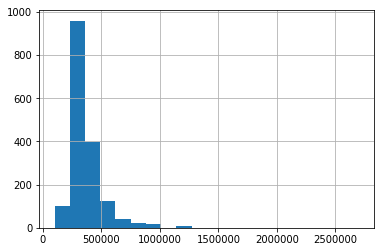

In [16]:
r.price.hist(bins=20) # histogram dla danych ciągłych (cena)
# oj, widać że jest parę mieszkań (mało) bardzo drogich

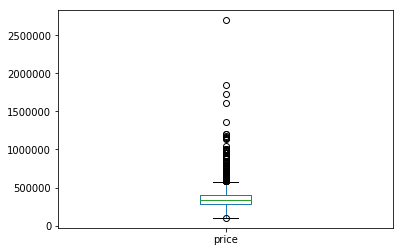

In [17]:
r.price.plot.box() # boxplot, jak widać mamy sporo odstających obserwacji!

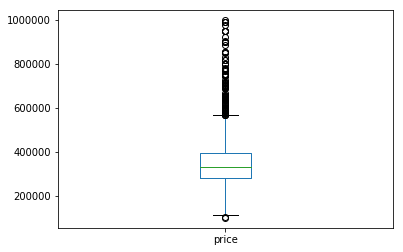

In [18]:
# Załóżmy, że chcemy się pozbyć obserwacji z cenami powyżej 99 percentyla:
r_price_cleared = r[r.price < r.price.quantile(0.99)]
r_price_cleared.price.plot.box() # tu już nie ma takiej rozbieżności

**Ćwiczenie**

Narysuj histogram cen mieszkań na podstawie df'a r_price_cleared

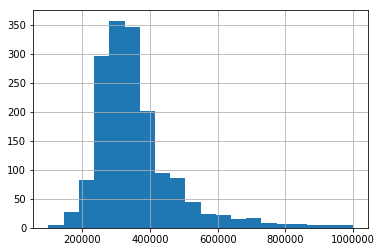

In [19]:
r_price_cleared.price.hist(bins=20)

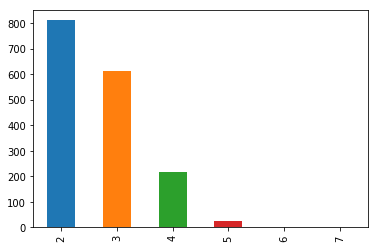

In [26]:
r.rooms.value_counts().plot.bar() # barplot dla danych dyskretnych (ilość pokoi)

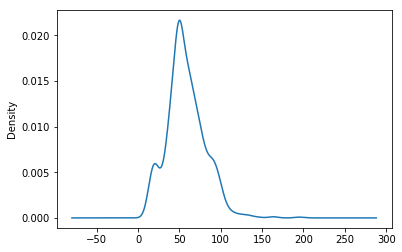

In [16]:
r.sqrMeters.plot.density()

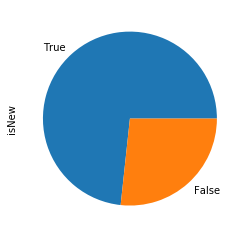

In [29]:
r.isNew.value_counts().plot.pie()

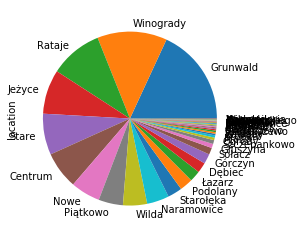

In [30]:
r.location.value_counts().plot.pie()

# Pobawmy się jeszcze samymi danymi dzięki pandasowi

In [27]:
r_price_sqrMeters = pd.DataFrame(r, columns=['price','sqrMeters']) # zrób data frame z 2 kolumn
r_price_sqrMeters.head()

,price,sqrMeters
0,476118.0,78
1,459531.0,62
2,411557.0,15
3,496416.0,14
4,406032.0,15


**Ćwiczenie**

Pokaż najtańsze mieszkanie.

In [35]:
r[r['price'] == min(r['price'])]

,price,isNew,rooms,floor,location,sqrMeters
339,100000.0,True,3,4,Stare,70


**Ćwiczenie**

pokaż tylko mieszkania używane powyżej 1kk

In [39]:
# r[(r['price'] > 1000000) & (~r['isNew'])]
r[(r['price'] > 1000000) & (r['isNew'] == False)]

,price,isNew,rooms,floor,location,sqrMeters
344,1200000.0,False,5,0,Starołęka,193
1123,1007500.0,False,4,1,Starołęka,94
1124,1203616.0,False,5,0,Starołęka,71
1188,1156054.0,False,4,0,Stare,52
1376,1156054.0,False,4,0,Stare,52


In [40]:
r['price_in_thousands'] = (r['price'] / 1000).astype(int) # dodaj nową kolumnę
r['price_in_thousands'].head()

0    476
1    459
2    411
3    496
4    406
Name: price_in_thousands, dtype: int64

In [41]:
r['price_in_thousands2'] = r.price.apply(lambda x: int(x / 1000) ) # można tez tak
r['price_in_thousands2'].head()

0    476
1    459
2    411
3    496
4    406
Name: price_in_thousands2, dtype: int64

In [42]:
r['price_in_thousands3'] = r.price.map(lambda x: int(x / 1000) ) # albo tak
r['price_in_thousands3'].head()

0    476
1    459
2    411
3    496
4    406
Name: price_in_thousands3, dtype: int64

In [43]:
r_max_price = r.copy()
r_max_price.price = r_max_price.price.map(lambda x: 1000000 if x > 1000000 else x) 
# dla cen mieszkań powyżej 1kk zmień cenę na 1kk
r_max_price.price.max()

1000000.0

# Spróbujemy znaleźć jakies zależnosci i je zwizualizować 
(wizualizacja dzięki bibliotece seaborn)

**Ćwiczenie**

Do zmiennej r wczytaj zawartość pliku ceny_mieszkan_w_poznaniu.tsv

In [44]:
#r = 

/Users/lukasz.knade/anaconda3/envs/html/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


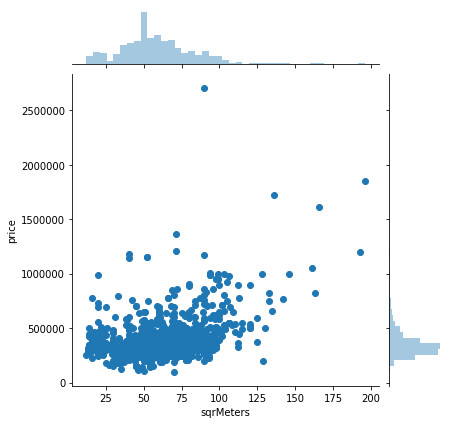

In [45]:
sns.jointplot(x = "sqrMeters", y = "price", data = r)

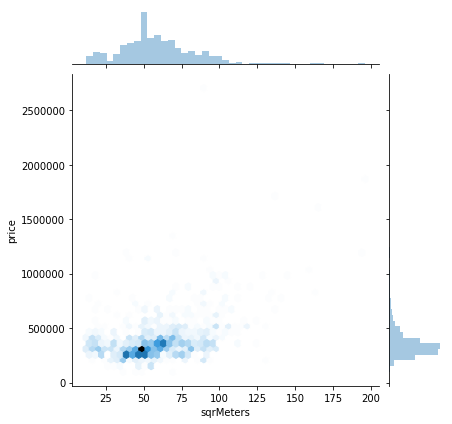

In [53]:
sns.jointplot("sqrMeters", "price", kind = "hex", data = r) # tak jest czytelniej

In [47]:
r.corr() # sprawdźmy korelację liniową cech
# widać że np ilość metrów jest skorelowana dodatnio z ceną
# potwierdza to, co widzimy na wykresach

,price,isNew,rooms,floor,sqrMeters,price_in_thousands,price_in_thousands2,price_in_thousands3
price,1.000000,0.034873,0.508833,-0.068882,0.422073,0.999998,0.999998,0.999998
isNew,0.034873,1.000000,0.008730,-0.062179,0.083835,0.035770,0.035770,0.035770
rooms,0.508833,0.008730,1.000000,-0.078585,0.377587,0.508950,0.508950,0.508950
floor,-0.068882,-0.062179,-0.078585,1.000000,-0.055053,-0.068947,-0.068947,-0.068947
sqrMeters,0.422073,0.083835,0.377587,-0.055053,1.000000,0.422251,0.422251,0.422251
price_in_thousands,0.999998,0.035770,0.508950,-0.068947,0.422251,1.000000,1.000000,1.000000
price_in_thousands2,0.999998,0.035770,0.508950,-0.068947,0.422251,1.000000,1.000000,1.000000
price_in_thousands3,0.999998,0.035770,0.508950,-0.068947,0.422251,1.000000,1.000000,1.000000


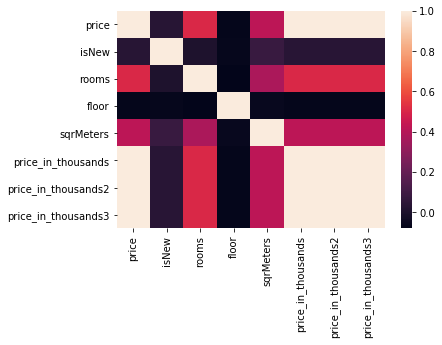

In [50]:
sns.heatmap(r.corr(), )

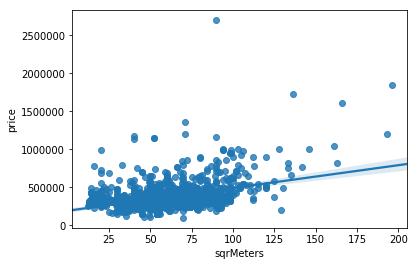

In [55]:
sns.regplot(r.sqrMeters, r.price) # rzeczywiście - im więcej metrów kw. tym większa cena

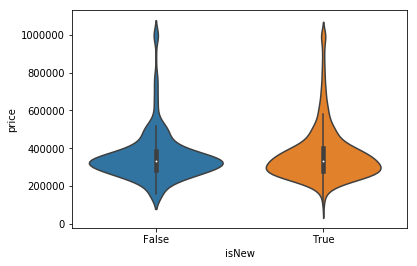

In [60]:
sns.violinplot(x = "isNew", y = "price", data = r_max_price) # 

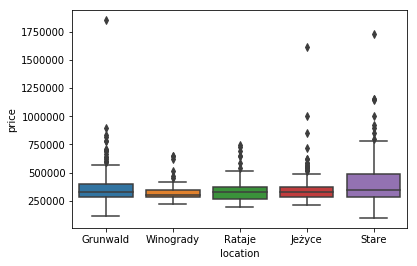

In [63]:
# ceny w zależności od lokacji (dla 5 najbardziej popularnych)
popular_locations = r.location.value_counts().head(5)
r_popular_locations = r[r.location.isin(popular_locations.keys())]
sns.boxplot(x = "location", y = "price", data = r_popular_locations) 

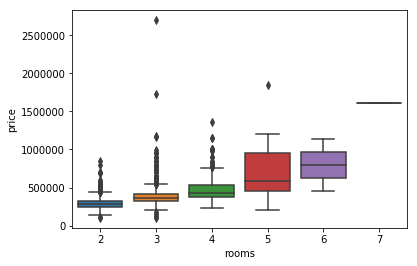

In [61]:
sns.boxplot(x="rooms", y = "price", data = r) # im więcej pokoi tym cena większa

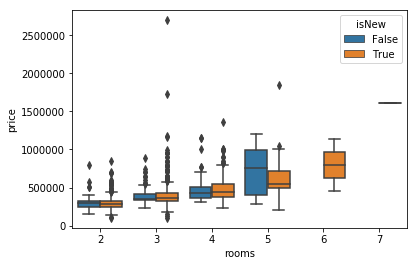

In [62]:
sns.boxplot(x="rooms", y = "price", hue = "isNew", data = r) 
# im więcej pokoi tym cena większa

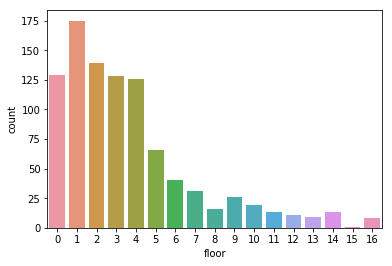

In [48]:
sns.countplot(x = "floor", data = r_popular_locations) 
# ten barplot jest bardziej kolorowy niż ten z pandasa :)

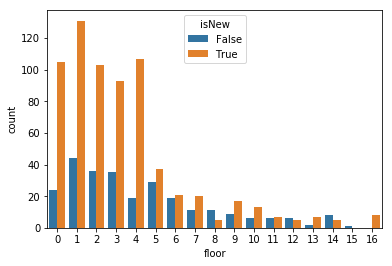

In [49]:
sns.countplot(x = "floor", hue = "isNew", data = r_popular_locations)

In [46]:
# ZADANIE STWÓRZ NOTEBOOKA I DOKONAJ PODOBNEJ ANALIZY DLA ceny_aut_w_polsce.tsv

auto = pd.read_csv('ceny_aut_w_polsce.tsv', sep = '\t')
auto

,price,mileage,year,brand,engingeType,engineCapacity
0,92000,75600,2012,Volvo,benzyna,3200
1,49300,21000,2016,Kia,diesel,1396
2,45900,66000,2015,Toyota,diesel,1400
3,32900,115000,2015,Skoda,diesel,1600
4,36900,200000,2012,Renault,diesel,2000
5,25900,105000,2014,Opel,diesel,1300
6,139900,104000,2013,Mercedes-Benz,diesel,3000
7,43900,53000,2015,Ford,benzyna,1000
8,11000,186800,2003,SEAT,diesel,1900
9,105000,57000,2012,Mercedes-Benz,diesel,2143


In [48]:
auto.describe().T

,count,mean,std,min,25%,50%,75%,max
price,48002.0,37803.583809,45473.115007,550.0,12900.0,23900.0,44900.0,499900.0
mileage,48002.0,142920.244156,89157.842544,1.0,82000.0,150000.0,197828.0,2413650.0
year,48002.0,2008.351298,5.629245,1927.0,2005.0,2008.0,2013.0,2017.0
engineCapacity,48002.0,1818.395942,590.021590,220.0,1500.0,1796.0,2000.0,8200.0
